# Análisis exploratorio de series de tiempo

In [1]:
# Archivo del pulgas

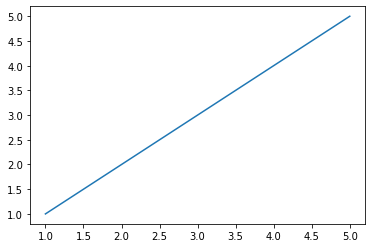

In [12]:
x = [1, 2, 3, 4, 5]
y = x
plt.plot(x, y)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

C:\Users\USUARIO\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


### Funciones de soporte para graficar funciones de autocorrelación

In [3]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

## Eliminar la tendencia usando estimación

Ejemplo usando los datos de temperatura global

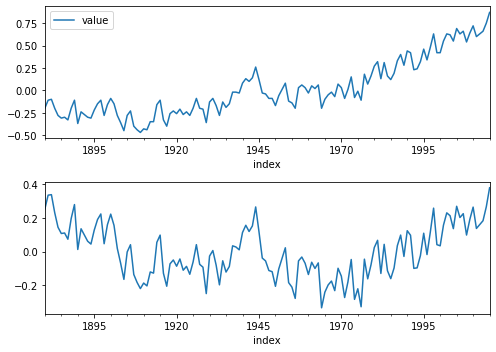

In [5]:
time = pd.Series([idx.ordinal for idx in globtemp.index], index=globtemp.index)
data_reg = pd.concat([time, globtemp], axis=1)
data_reg.columns = ["time", "gtemp"]

fit = ols(formula="gtemp ~ time", data=data_reg).fit()

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
globtemp.plot(ax=axes[0])#, xlabel='Time', ylabel='Temperature Deviations', title='Global Temperature', legend=False)

fit.resid.plot(ax=axes[1])#, xlabel="Time", title="detrended via estimation")
fig.tight_layout()
plt.show()

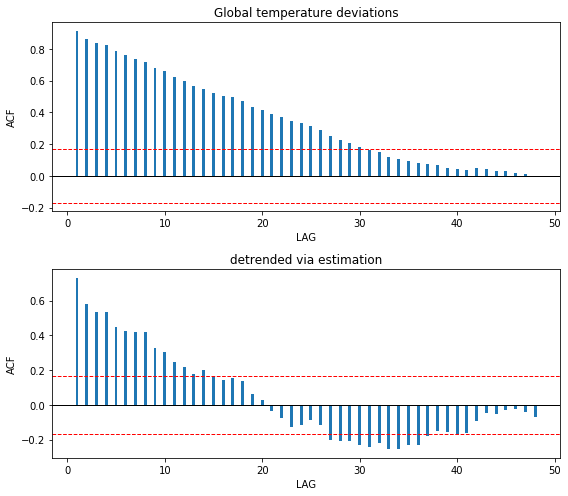

In [6]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(globtemp, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Global temperature deviations")

acf1(fit.resid, nlags=48, ax=axes[1], width=.3)
axes[1].set_title("detrended via estimation")

fig.tight_layout()
plt.show()

## Eliminar la tendencia usando diferenciación

Ejemplo usando los datos de temperatura global

AttributeError: 'Line2D' object has no property 'xlabel'

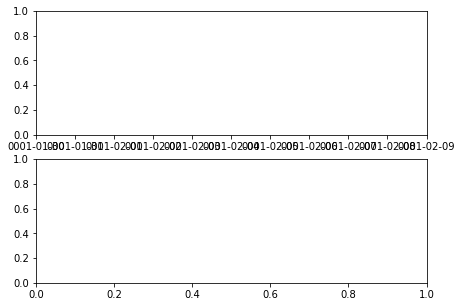

In [7]:
time = pd.Series([idx.ordinal for idx in globtemp.index], index=globtemp.index)
data_reg = pd.concat([time, globtemp], axis=1)
data_reg.columns = ["time", "gtemp"]

fit = ols(formula="gtemp ~ time", data=data_reg).fit()

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
globtemp.plot(ax=axes[0], xlabel='Time', ylabel='Temperature Deviations', title='Global Temperature', legend=False)

gtemp.diff().plot(ax=axes[1], xlabel="Time", 
                    title="first difference \n of the original series (not detrended)",
                    legend=False)
fig.tight_layout()
plt.show()

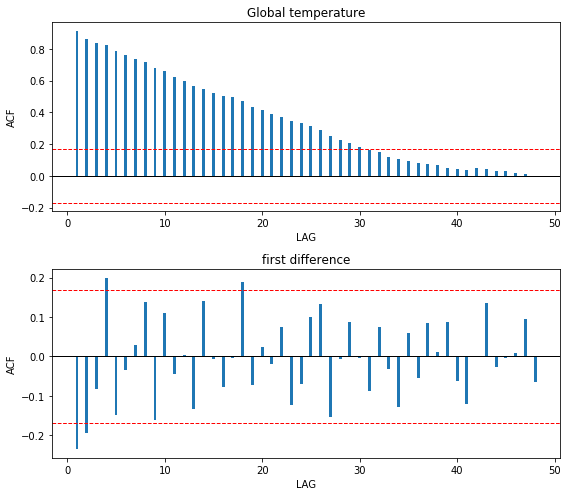

In [8]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(globtemp, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Global temperature")

acf1(globtemp.diff().dropna(), nlags=48, ax=axes[1], width=.3)
axes[1].set_title("first difference")

fig.tight_layout()
plt.show()

### Transformación logarítmica de una serie para reducir sus extremos 

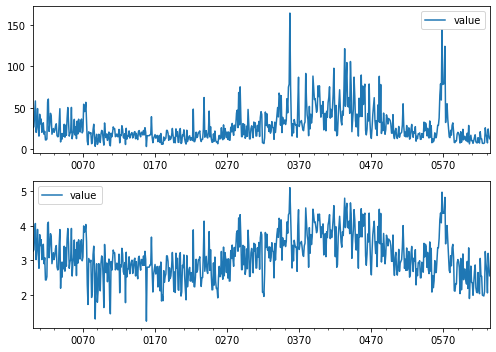

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
varve.plot(ax=axes[0])#, title="varve", xlabel="Time", legend=False)
varve.apply(np.log).plot(ax=axes[1])#, title="log(varve)", xlabel="Time", legend=False)
fig.tight_layout()
plt.show()